<a href="https://colab.research.google.com/github/Yogi-Puvvala/Machine_Learning/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("sample_data/california_housing_train.csv")
df.shape

(17000, 9)

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


# **EDA**

In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


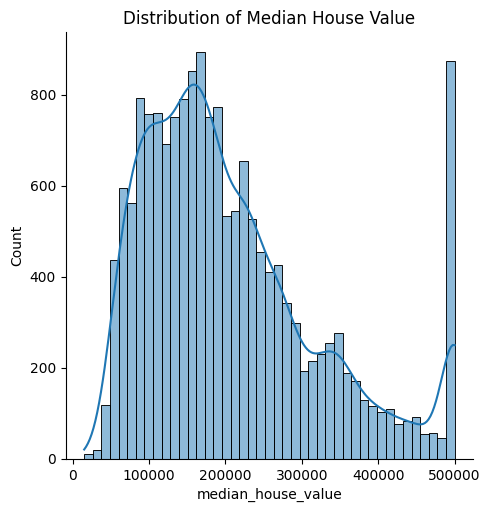

In [5]:
sns.displot(x = "median_house_value", data = df, kind = "hist", kde = True)

plt.title("Distribution of Median House Value")
plt.show()

**Conclusion**: The histogram shows most houses are clustered around $150,000–$200,000, with a secondary peak at $500,000 likely due to data capping.

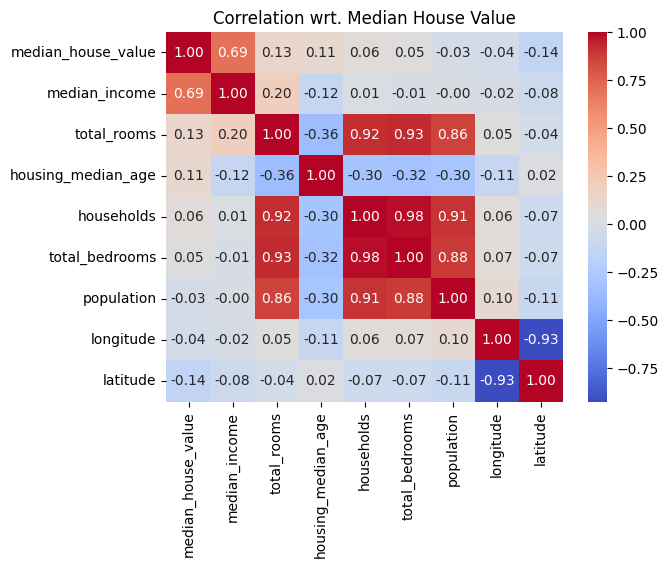

In [6]:
corr_mat = df.corr()
top_corr = corr_mat["median_house_value"].sort_values(ascending=False).head(11)
df_high_corr = df[top_corr.index].corr()

sns.heatmap(df_high_corr, annot = True, fmt = ".2f", cmap="coolwarm")
plt.title("Correlation wrt. Median House Value")

plt.show()

**Conclusion**: The target(Median House Median) highly correlated with the median_income and total_rooms

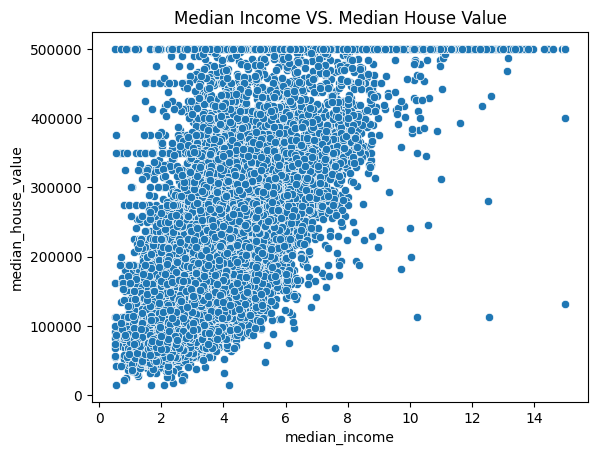

In [7]:
sns.scatterplot(x = "median_income", y = "median_house_value", data = df)

plt.title("Median Income VS. Median House Value")
plt.show()

**Conclusion**: Higher median income generally correlated with higher median house values.

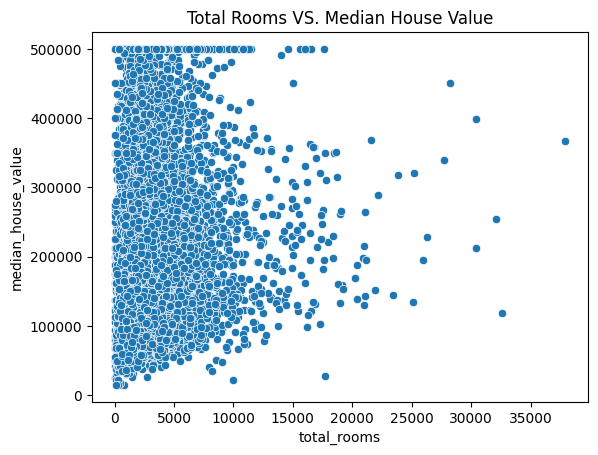

In [8]:
sns.scatterplot(x = "total_rooms", y = "median_house_value", data = df)

plt.title("Total Rooms VS. Median House Value")
plt.show()

**Conclusion**: The scatter plot shows a weak positive correlation between the total number of rooms and the median house value, with most data points clustered at lower room counts.

# **Data Preprocessing**

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

In [10]:
X = df[df_high_corr.index].drop("median_house_value", axis = 1)
y = df["median_house_value"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [31]:
scaler = StandardScaler()

scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[ 0.69144   ,  1.20167242,  0.10606026, ...,  0.57481825,
         0.75709387, -0.7591329 ],
       [-1.1180817 ,  0.27996153, -1.6458986 , ...,  1.07232138,
         0.15310009,  0.08026596],
       [-0.07729394, -0.42591426, -1.40699512, ..., -0.29114283,
        -1.19964631,  0.79774097],
       ...,
       [-0.12592546, -0.17071301,  0.42459824, ..., -0.35311848,
         1.19636208, -1.31716901],
       [ 0.79095401, -0.32953507, -1.08845714, ..., -0.49999227,
        -0.10646748,  0.57265077],
       [ 2.47363592, -0.51957855,  1.85801912, ..., -0.78015615,
         1.18637871, -1.34530529]])

# **Training and Evaluating**

In [32]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error

In [33]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [34]:
lin_pred = lin_reg.predict(X_test)

print("r2_score(Linear):", r2_score(y_test, lin_pred))
print("MSE(Linear):", mean_squared_error(y_test, lin_pred))

r2_score(Linear): 0.6487760964568579
MSE(Linear): 4828430866.065221


In [35]:
train_score = lin_reg.score(X_train, y_train)
test_score = lin_reg.score(X_test, y_test)
print(f"Train_score: {train_score: .2f}, Test_score: {test_score: .2f}")

Train_score:  0.64, Test_score:  0.65


In [36]:
lin_reg.coef_

array([ 76931.98017807, -18071.09958218,  14731.76755077,  14353.32171731,
        51409.42779556, -42940.46342066, -85670.66060794, -90798.43501725])

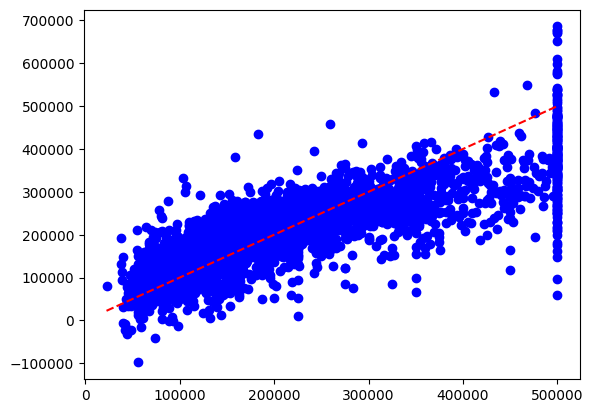

In [37]:
plt.scatter(y_test, lin_pred, c = "blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')

plt.show()

In [38]:
r_reg = Ridge()
r_reg.fit(X_train, y_train)

Ridge()

In [39]:
r_pred = r_reg.predict(X_test)

print(f"r2_score(Rigid):", r2_score(y_test, r_pred))

r2_score(Rigid): 0.6487633474370375


In [40]:
train_score = r_reg.score(X_train, y_train)
test_score = r_reg.score(X_test, y_test)
print(f"Test_score: {train_score: .2f}, Test_score: {test_score: .2f}")

Test_score:  0.64, Test_score:  0.65


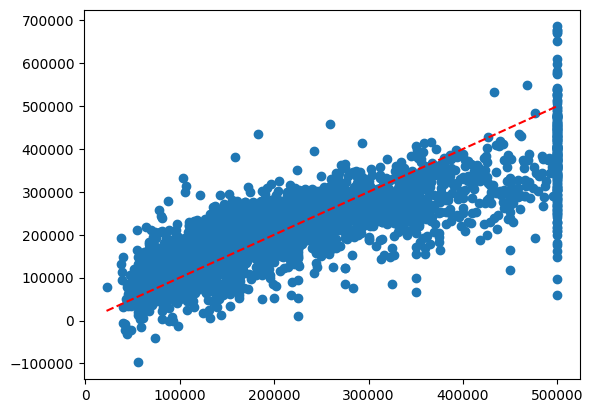

In [41]:
plt.scatter(y_test, r_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')

plt.show()

# **GSCV(Regid)**

In [42]:
params = {"alpha" : np.logspace(-3, 3, 50)}
mod_r = GridSearchCV(r_reg, params, cv = 5)
mod_r.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-03, 1.32571137e-03, 1.75751062e-03, 2.32995181e-03,
       3.08884360e-03, 4.09491506e-03, 5.42867544e-03, 7.19685673e-03,
       9.54095476e-03, 1.26485522e-02, 1.67683294e-02, 2.22299648e-02,
       2.94705170e-02, 3.90693994e-02, 5.17947468e-02, 6.86648845e-02,
       9.10298178e-02, 1.20679264e-01, 1.59985872e-01, 2....
       8.68511374e-01, 1.15139540e+00, 1.52641797e+00, 2.02358965e+00,
       2.68269580e+00, 3.55648031e+00, 4.71486636e+00, 6.25055193e+00,
       8.28642773e+00, 1.09854114e+01, 1.45634848e+01, 1.93069773e+01,
       2.55954792e+01, 3.39322177e+01, 4.49843267e+01, 5.96362332e+01,
       7.90604321e+01, 1.04811313e+02, 1.38949549e+02, 1.84206997e+02,
       2.44205309e+02, 3.23745754e+02, 4.29193426e+02, 5.68986603e+02,
       7.54312006e+02, 1.00000000e+03])})

In [23]:
mod_r_pred = mod_r.predict(X_test)

print(f"r2_score:", r2_score(y_test, mod_r_pred))

r2_score: 0.6485623334559042


In [24]:
train_score = mod_r.score(X_train, y_train)
test_score = mod_r.score(X_test, y_test)
print(f"Test_score: {train_score: .2f}, Test_score: {test_score: .2f}")

Test_score:  0.64, Test_score:  0.65


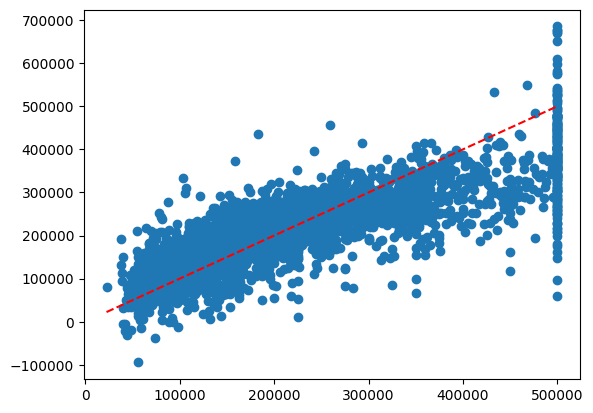

In [25]:
plt.scatter(y_test, mod_r_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "--r")

plt.show()